# Praktikum Intelligente Sensortechnik 4
Tim Tiedemann, Thomas Lehmann, Tobias De Gasparis

Version 11.05.2023

# Einfache intelligente Sensoren und Datenvorverarbeitung
Im Praktikum 4 geht es um die Verarbeitung hochdimensionaler Daten bzw. die Klassifikation der Daten.

Lesen Sie sich die Aufgaben gut durch. Sollten Sie eine Aufgabe nicht lösen können, so beschreiben Sie zumindest, wie weit Sie gekommen sind und auf welche Weise Sie vorgegangen sind.

Beachten Sie auf der methodischen Seite, dass die Schritte der Datenerhebung, der Datenauswertung und der Kommentierung des Ergebnisses ausgeführt werden. Alle Diagramme sind korrekt zu beschriften.

Die Aufgaben sind direkt hier als Protokoll zu bearbeiten. Das abgegebene Notebook soll ausführbar sein. Daneben ist der PDF-Export des Notebook mit abzugeben.

Autoren des Protokolls: Khanh Nhu Pham, Berivan Elmas

# Hintergrund
Intelligente Sensoren sollen nicht nur Daten erfassen, sondern direkt eine Klassifikation mit Informationen auf abstrakterer Ebene aus der Umwelt liefern. Beispielsweise soll eine Geste oder Gegenstände erkannt werden und diese Information über die Schnittstelle zu weiteren Systemkomponenten bereitgestellt werden. In diesem Praktikum wird die Leistungsfähigkeit der Klassifikation einfacher Algorithmen des nicht-überwachten Machine Learnings für diese Aufgabe untersucht.

# Vorbereitungsaufgaben
## Sensoren mit hochdimensionaler Ausgabe von Daten
Besorgen Sie sich Informationen zu den folgenden Sensoren: 

- Hokuyo URG-04LX-UG01
- Hokuyo UTM-30LX-EW
- Velodyne VLP-16

Um was für einen Sensor handelt es sich jeweils und welches Messprinzip wird verwendet? Was wird gemessen? Was sind hier der Messbereich, die Auflösung und die Sample-/Messrate?

- Hokuyo URG-04LX-UG01
    - Umgebungsscanner über Infrarot, Phasenverschiebung
    - Messbereich: 20mm-4000mm
    - Die Messrate beträgt 10Hz
    - Die Auflösung beträgt 1mm
    
- Hokuyo UTM-30LX-EW
    - Umgebungsscanner, Triangulationsprinzip
    - Messbereich: 0.1m-30m
    - Die Messrate beträgt 40Hz
    - Die Auflösung beträgt 1mm
    
- Velodyne VLP-16
    - Distanzmessung über Infrarot, TOF
    - Messbereich:100m
    - Die Samplerate beträgt 18.08 kHz pro IR-Detektor
    - Die Winkelauflösung beträgt horizontal 0.1°-0.4° und vertikal 2.0°

Über welche Schnittstelle(n) können die Messdaten ausgegeben werden? Wie werden jeweils Betriebsspannung und Datenleitungen angeschlossen?

- Hokuyo URG-04LX-UG01 USB
- Hokuyo UTM-30LX-EW Datenblatt Abschnitt 6.1 S.4
- Velodyne VLP-16 User Manual Abschnitt 2.1 S.18

# Im Labor

## Objektidentifikation in Daten von Laserscannern
Mit LiDARs vom Typ Hokuyo URG-04LX-UG01 sollen Sie die Umgebung der Sensoren erfassen und mittels Clustering-Algorithmus auswerten. Sie sollen untersuchen, ob die Objekte der Umgebung durch den Cluster-Algorithmus gefunden werden.

### Datenerfassung

Verwenden Sie in Absprache mit dem Laborbetreuer einen Sensor vom Typ Hokuyo URG-04LX-UG01 für die Datenerfassung. Wie werden Daten erfasst und wie können sie auf diese zugreifen?

- Über einen eingerichteten Remote-Zugriff kann nach der Anleitung (s.Teams) ein Zugriff auf die Daten, welche nach Ausführen des Skripts gemessen werden, zugegriffen werden. Die Daten werden in der Konsole ausgegeben, über die das Skript ausgeführt wurde.

Sammeln Sie Daten von einem Scan und versuchen Sie die Daten in einer zweidimensionalen Karte darzustellen. Können Sie Objekte in der Umgebung identifizieren?

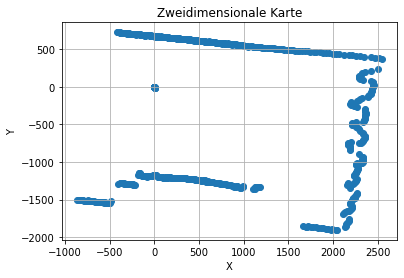

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

x_values = []
y_values = []

# Daten sammeln
with open("test_data.txt", "r") as file:
    scan_data = file.read()

# Daten in x- und y-Koordinaten aufteilen
data_pairs = scan_data.split(", ")

for pair in data_pairs:
    x, y = pair.split(":")
    valx = float(y)*math.cos((float(x))*(math.pi/180))
    valy = float(y)*math.sin((float(x))*(math.pi/180))
    x_values.append(valx)
    y_values.append(valy)

# CSV-Datei schreiben
with open('test_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['X', 'Y'])  # Header schreiben
    for i in range(len(x_values)):
        writer.writerow([x_values[i], y_values[i]])  # Datenzeilen schreiben

# Plot erstellen
plt.scatter(x_values, y_values)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Zweidimensionale Karte')
plt.grid(True)
plt.show()
# Zweidimensionale Karte erstellen
# plt.scatter(x, y)

# Plot anzeigen
plt.show()

- ein Vorhang
- eventuell ein Schreibtisch oder Sofa

Nehmen Sie von zwei LiDARs einen Scan auf. Gehen Sie davon aus, dass einer der Laserscanner im Ursprung eines karthesischen Koordinatensystems (Weltkoordinatensystem) angebracht ist und mit der Mittelachse genau in Richtung der y-Achse ausgerichtet ist. Fügen Sie die Daten des zweiten Laserscanners mittels geeigneter Rotation und Translation (Argumente experimentell bestimmen) in das Weltkoordinatensystem ein, so dass sich ein Gesamtbild in der Karte ergibt. Geben Sie die nötige Rotationsmatrix und den Translationsvektor an bzw. bauen Sie Ihre Datentransformation so auf, dass mit einer Rotationsmatrix und einem Translationsvektor gearbeitet wird.  

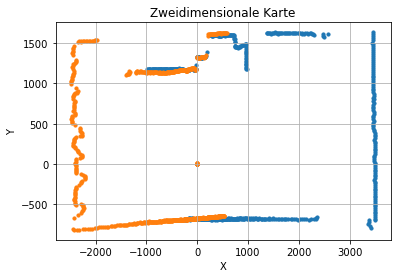

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

x_values = []
y_values = []

# Daten sammeln
with open("test1_data.txt", "r") as file:
    scan_data = file.read()

with open("test_data.txt", "r") as file:
    scan_sec = file.read()
# Daten in x- und y-Koordinaten aufteilen
data_pairs1 = scan_data.split(", ")
data_pairs2 = scan_sec.split(", ")

# Rotationswinkel in Grad
rotation_angle = 10

# Rotationsmatrix
rotation_matrix = np.array([[math.cos(math.radians(rotation_angle)), -math.sin(math.radians(rotation_angle))],
                            [math.sin(math.radians(rotation_angle)), math.cos(math.radians(rotation_angle))]])

for pair in data_pairs1:
    x, y = pair.split(":")
    valx = float(y) * math.cos((float(x)) * (math.pi / 180))
    valy = float(y) * math.sin((float(x)) * (math.pi / 180))
    rotated_coords = np.dot(rotation_matrix, np.array([valx, valy]))
    rotated_valx, rotated_valy = rotated_coords[0], rotated_coords[1]
    x_values.append(rotated_valx)
    y_values.append(rotated_valy)

plt.scatter(x_values, y_values, s = 10)

x_values = []
y_values = []
rotation_angle = 190
# Rotationsmatrix
rotation_matrix = np.array([[math.cos(math.radians(rotation_angle)), -math.sin(math.radians(rotation_angle))],
                            [math.sin(math.radians(rotation_angle)), math.cos(math.radians(rotation_angle))]])

for pair in data_pairs2:
    x, y = pair.split(":")
    valx = float(y) * math.cos((float(x)) * (math.pi / 180))
    valy = float(y) * math.sin((float(x)) * (math.pi / 180))
    rotated_coords = np.dot(rotation_matrix, np.array([valx, valy]))
    rotated_valx, rotated_valy = rotated_coords[0], rotated_coords[1]
    x_values.append(rotated_valx)
    y_values.append(rotated_valy)


# Plot erstellen
plt.scatter(x_values, y_values, s = 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Zweidimensionale Karte')
plt.grid(True)
plt.show()



### Clustering der Daten

Führen Sie nun ein Clustering mittels DBSCAN aus der scikit-learn-Bibliothek auf den gesammelten LiDAR-Daten von einem Sensor durch. Verwenden Sie evtl. erstmal nur einen Teil, z.B. die ersten 100 Sensordimensionen (Entfernungswerte). Finden Sie geeignete Parameter “min_samples” und “eps”. Stellen  Sie die Cluster-Zuordnung der Punkte in der Karte dar. 

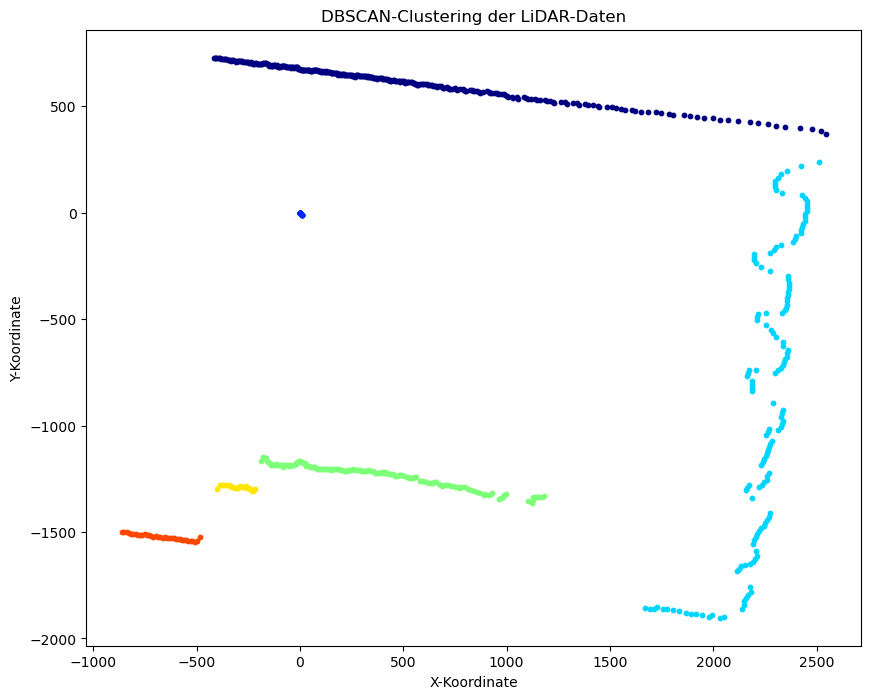

In [25]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd

# LiDAR-Daten aus der CSV-Datei laden
lidar_data = pd.read_csv('test_data.csv')
lidar_subset = lidar_data.iloc[:1024, :].values  # Die ersten 100 Sensordimensionen verwenden

# Parameter für DBSCAN
min_pts = 5  # Anzahl der Nachbarn, um einen Kernpunkt zu definieren
epsilon = 130  # Radius

# DBSCAN-Modell erstellen und Clustering durchführen
dbscan = DBSCAN(eps=epsilon, min_samples=min_pts)
clusters = dbscan.fit_predict(lidar_subset)

# Cluster-Labels abrufen
unique_labels = np.unique(clusters)

# Cluster-Zuordnung auf einer Karte darstellen
plt.figure(figsize=(10, 8))
for label in unique_labels:
    if label == -1:
        # Rauschen (Outlier) in Grau darstellen
        color = 'gray'
    else:
        # Verschiedene Cluster mit unterschiedlichen Farben darstellen
        color = plt.cm.jet(float(label) / np.max(clusters + 1))
    cluster_points = lidar_subset[clusters == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10, color=color)

plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.title('DBSCAN-Clustering der LiDAR-Daten')
plt.show()


Wieviele Cluster werden in Ihrem Datensatz identifiziert? Welche Objekte könnten es sein?

- 6 Cluster
- Hellblau: Vorhang
- Dunkelblau: Wand
- Rot: Teil der Wand
- Grün und Gelb: nicht erkennbare Objekte
- Mittelblau: eventuell der andere Sensor oder ein Mensch?

Sollte im LiDAR-Datensatz eine Standardisierung durchgeführt werden? Was spricht dafür und was dagegen? Beachten Sie die Arbeitsweise von DBSCAN.

- Die Darstellung ändert sich nicht, die Formen bleiben nach der Standardisierung erhalten. Der Radius im DBSCAN muss allerdings angepasst werden, da die Skala auf einen kleineren Maßstab "reduziert" wird.

Können Sie eine Daumenregel für die Wahl der Parameter von DBSCAN ableiten, so dass Objekte in der Umgebung als getrennte Objekte erkannt werden

- Den Umkreis gerade klein genug wählen, dass die Datenpunkte desselben Objekts darin landen und die weiteren zugehörigen Datenpunkte ins Cluster ziehen
- klein genug heißt: Datenpunkte von einem anderen Objekt sind im besten Fall etwas weiter entfert als die, die von der Messung des selben Objekts stammen. Durch den kleineren Umkreis werden diese also im besten Fall nicht ins Cluster gezogen.

## Bewegungserkennung
Aus den Daten der Sensoren des Nucleo-Moduls soll nun eine Bewegung identifiziert werden.

### Datenerfassung

Verwenden Sie im folgenden das IKS01A3-Board und Ihr Programm, wie Sie es zum Sammeln der 12-dimensionalen 1024-Sample Datensätzen verwendet haben.

Nehmen Sie einen Datensatz auf, in dem das Modul zunächst still in einer Postion (und Ausrichtung) steht, dann eine Bewegung durchgeführt wird (Translation und dann Rotation) und das Modul dann still in einer anderen Position (und Ausrichtung) steht. Dokumentieren (Skizze) Sie die Bewegung! (Empfehlung: Filmen Sie die Bewegung, damit Sie ggf. einige Punkte in den Datensätzen bei der Auswertung besser einer Bewegung zuordnen können.)

### Auswertung
Stellen Sie sich diesen Datensatz graphisch als Plot (2D/3D) dar und prüfen Sie, ob die verschiedenen Phasen zu erkennen sind. Zeigen Sie hier einen geeigneten Plot/Ausschnitt.

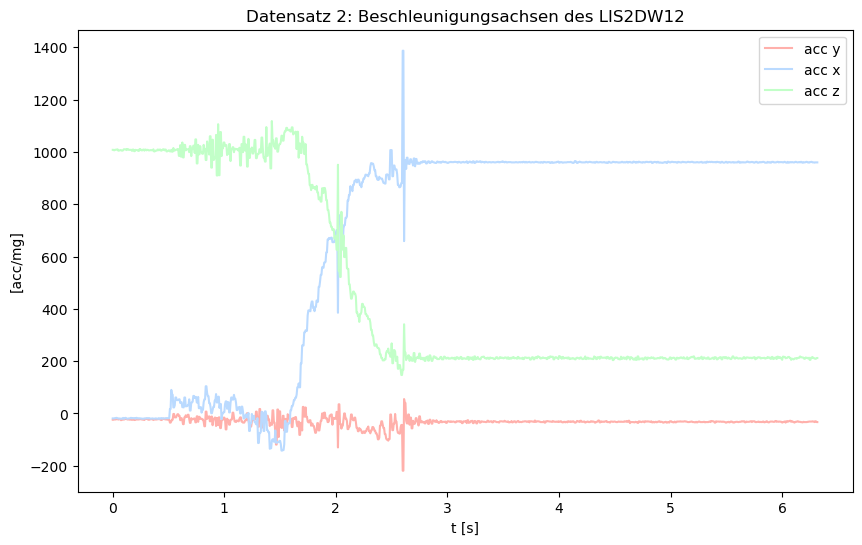

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.genfromtxt("Datensatzrichtig1.csv", delimiter=";", usecols=(7,))
data_y = np.genfromtxt("Datensatzrichtig1.csv", delimiter=";", usecols=(8,))
data_z = np.genfromtxt("Datensatzrichtig1.csv", delimiter=";", usecols=(9,))

length = 1024

# Anpassung der x-Achse
time_in_seconds = length / 162
x = np.arange(0, time_in_seconds, 1/162)
plt.figure(figsize=(10, 6))

plt.plot(x, data_y, color='#ffb0ab', label='acc y')
plt.plot(x, data_x, color='#badaff', label='acc x')
plt.plot(x, data_z, color='#c2ffc8', label='acc z')


plt.title("Datensatz 2: Beschleunigungsachsen des LIS2DW12")
plt.xlabel("t [s]")
plt.ylabel("[acc/mg]")
plt.legend()
plt.show()

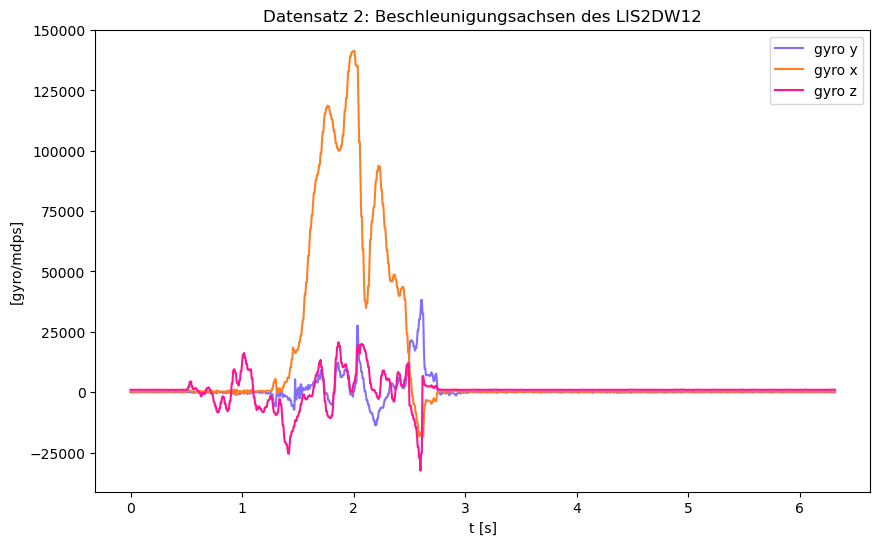

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data_xg = np.genfromtxt("Datensatzrichtig1.csv", delimiter=";", usecols=(4,))
data_yg = np.genfromtxt("Datensatzrichtig1.csv", delimiter=";", usecols=(5,))
data_zg = np.genfromtxt("Datensatzrichtig1.csv", delimiter=";", usecols=(6,))

length = 1024

# Anpassung der x-Achse
time_in_seconds = length / 162
x = np.arange(0, time_in_seconds, 1/162)
plt.figure(figsize=(10, 6))

plt.plot(x, data_yg, color='#836FFF', label='gyro y')
plt.plot(x, data_xg, color='#FF7F24', label='gyro x')
plt.plot(x, data_zg, color='#FF1493', label='gyro z')

plt.title("Datensatz 2: Beschleunigungsachsen des LIS2DW12")
plt.xlabel("t [s]")
plt.ylabel("[gyro/mdps]")
plt.legend()
plt.show()

Versuchen Sie mittels Clustering-Algorithmus (k-Means und DBSCAN) die Bewegungen/Bewegungsabschnitte in den Daten zu identifizieren. Welches Verfahren kann wie gut die Bewegung/Bewegungsabschnitte bei welchen Parametern identifizieren? Welche Normierung/Skalierung war sinnvoll? Ist eine Reduktion mit PCA sinnvoll? Stellen Sie die Ergebnisse des Clusterings ggf. auch in Plots über die Zeit dar.

Fügen Sie hier Ihre Analyse kommentiert ein.

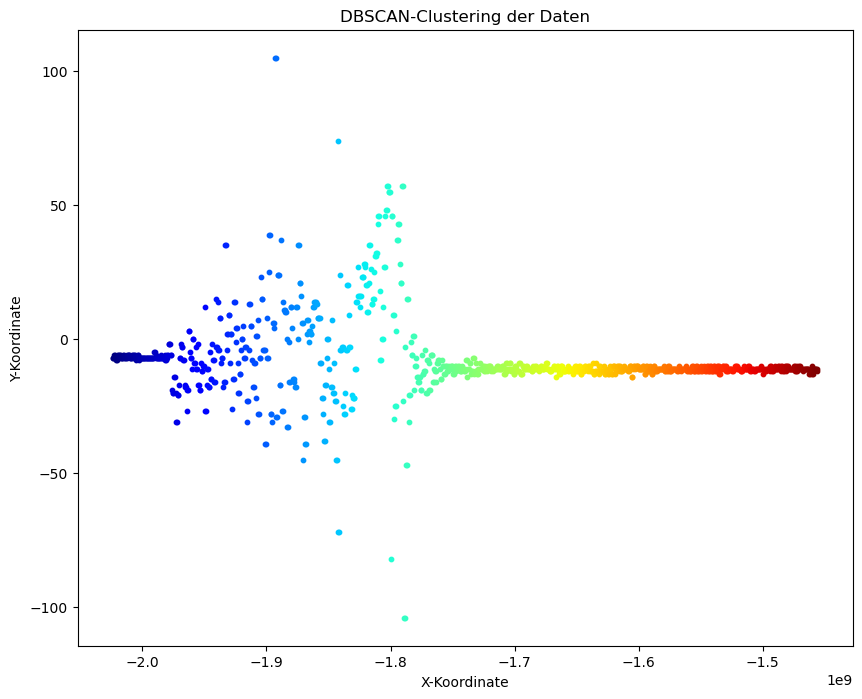

In [26]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Datensatz laden
data_df = pd.read_csv('Datensatzrichtig1.csv', header=1, delimiter=';')

# Konvertiere DataFrame in Numpy Array
data_array = data_df.values

# Parameter für DBSCAN
min_samples = 1 # Anzahl der Nachbarn, um einen Kernpunkt zu definieren
eps = 0.3  # Radius

# DBSCAN-Modell erstellen und Clustering durchführen
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(data_array)

# Cluster-Labels abrufen
unique_labels = np.unique(clusters)

# Cluster-Zuordnung auf einer Karte darstellen
plt.figure(figsize=(10, 8))
for label in unique_labels:
    if label == -1:
        # Rauschen
        color = 'gray'
    else:
        # Verschiedene Cluster mit unterschiedlichen Farben darstellen
        color = plt.cm.jet(float(label) / np.max(clusters + 1))
    cluster_points = data_array[clusters == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10, color=color)

plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.title('DBSCAN-Clustering der Daten')
plt.show()


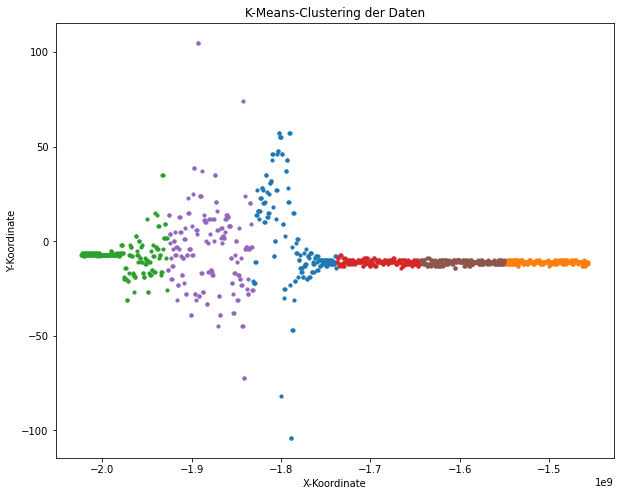

In [20]:
from sklearn.cluster import KMeans


# Datensatz laden
data_df = pd.read_csv('Datensatzrichtig1.csv', delimiter=';', header=1)

# Konvertiere DataFrame in Numpy Array
data_array = data_df.values

# Anzahl der Cluster (K)
k = 6

# K-Means-Modell erstellen und Clustering durchführen
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(data_array)

# Cluster-Zuordnung auf einer Karte darstellen
plt.figure(figsize=(10, 8))
for label in range(k):
    cluster_points = data_array[clusters == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10)

plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.title('K-Means-Clustering der Daten')
plt.show()


### Sensorsystem
Wenn Sie nun das Sensorboard zusammen mit den Cluster-Algorithmen als Sensorsystem betrachten, welche Information(en) könnte die Schnittstelle des Sensorsystems als Ergebnis der Klassifikation bereitstellen? 

- Wenn die Klassifizierungen bereits bei der Ausgabe der Sensordaten angewendet werden, dann werden einzelne Datenpunkte gesammelt und als eine spezifische Bewegung interpretiert/ausgegeben --> ordnet Datenpunkte und Folgeaufnahmen einer Bewegung zu